# Question 1

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
# Read the wine dataset
dataset = load_wine()
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
df = df.assign(target=pd.Series(dataset['target']).values)
# Filter the irrelevant columns
df = df[['alcohol', 'magnesium', 'target']]
# Filter the irrelevant label
df = df[df.target != 2]
train_df = df.drop(df.index[45:75])
val_df = df[45:75]

#### 1.1)

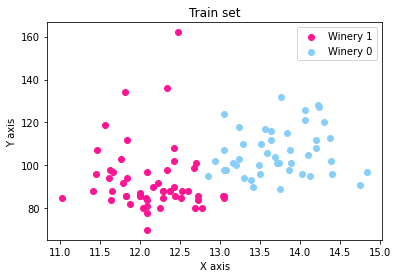

In [13]:
train_df1 = train_df[train_df['target'] == 1] 
train_df0 = train_df[train_df['target'] == 0] 

colormap = np.array(['deeppink', 'lightskyblue'])

fig,ax = plt.subplots()
ax.scatter(train_df1['alcohol'],train_df1['magnesium'], marker='o',color='deeppink', label = "Winery 1")
ax.scatter(train_df0['alcohol'],train_df0['magnesium'], marker='o',color='lightskyblue', label = "Winery 0")

ax.legend()
plt.title('Train set')
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.show()



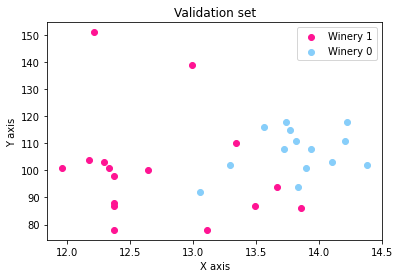

In [14]:
val_df1 = val_df[val_df['target'] == 1] 
val_df0 = val_df[val_df['target'] == 0] 

colormap = np.array(['deeppink', 'lightskyblue'])

fig,ax = plt.subplots()
ax.scatter(val_df1['alcohol'],val_df1['magnesium'], marker='o',color='deeppink', label = "Winery 1")
ax.scatter(val_df0['alcohol'],val_df0['magnesium'], marker='o',color='lightskyblue', label = "Winery 0")

plt.title('Validation set')
ax.legend()
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.show()

The data isn't linearly separable, therefore the Hard SVM will not converge, so no solution will be returned.

#### 1.2)

In [15]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=50, linewidth=1, facecolors='none', edgecolor='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

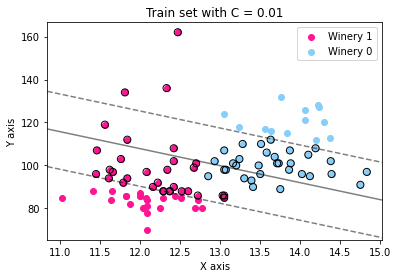

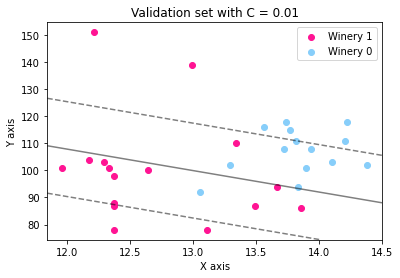

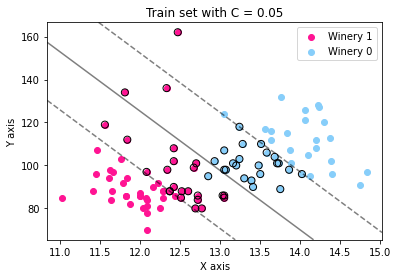

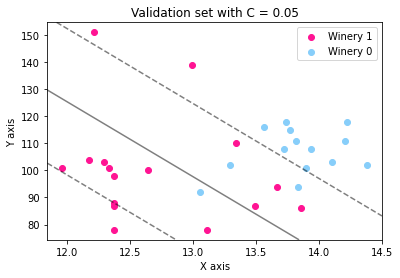

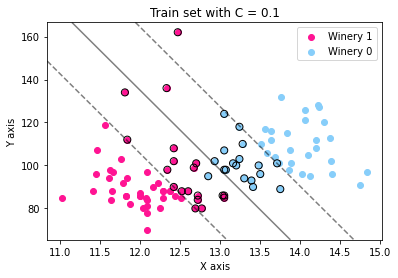

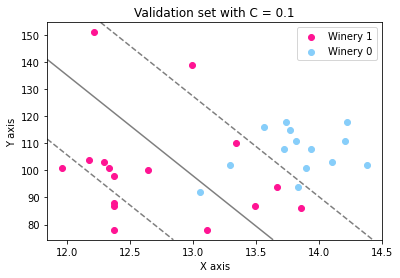

In [16]:
from sklearn.svm import SVC
C = [0.01, 0.05, 0.1]
for c in C:
    model = SVC(kernel='linear', C=c)
    model.fit(train_df[['alcohol', 'magnesium']], train_df['target'])
    
    train_df1 = train_df[train_df['target'] == 1] 
    train_df0 = train_df[train_df['target'] == 0] 

    colormap = np.array(['deeppink', 'lightskyblue'])

    fig,ax = plt.subplots()
    ax.scatter(train_df1['alcohol'],train_df1['magnesium'], marker='o',color='deeppink', label = "Winery 1")
    ax.scatter(train_df0['alcohol'],train_df0['magnesium'], marker='o',color='lightskyblue', label = "Winery 0")

    ax.legend()
    plt.title('Train set with C = '+str(c))
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plot_svc_decision_function(model)
    
    val_df1 = val_df[val_df['target'] == 1] 
    val_df0 = val_df[val_df['target'] == 0] 

    colormap = np.array(['deeppink', 'lightskyblue'])

    fig,ax = plt.subplots()
    ax.scatter(val_df1['alcohol'],val_df1['magnesium'], marker='o',color='deeppink', label = "Winery 1")
    ax.scatter(val_df0['alcohol'],val_df0['magnesium'], marker='o',color='lightskyblue', label = "Winery 0")

    plt.title('Validation set with C = '+str(c))
    ax.legend()
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plot_svc_decision_function(model, plot_support= False)


#### 1.4)

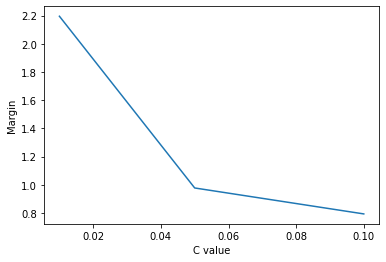

In [17]:
margins = []
for c in C:
    model = SVC(kernel='linear', C=c)
    model.fit(train_df[['alcohol', 'magnesium']], train_df['target'])
    margins.append(abs(1/ (np.sum(model.coef_**2))**0.5))
    
plt.plot(C, margins)
plt.ylabel('Margin')
plt.xlabel('C value')
plt.show()

It can be clearly seen that the size of the margin decreases as C increases. <br>
We know that C is a regulizer for the 'punishment' for how much we are willing to let points stray from the margins, the larger the C the more value we attribute to the punishment value, so it stands to reason that the more value we attribute to said punishment, the smaller the margin, becuase know we care more whether a point strays from the margin. 

#### 1.5)

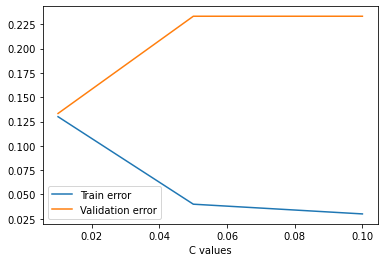

In [18]:
train_error = []
val_error = []
for c in C:
    model = SVC(kernel='linear', C=c)
    model.fit(train_df[['alcohol', 'magnesium']], train_df['target'])
    train_pred = model.predict(train_df[['alcohol', 'magnesium']])
    val_pred = model.predict(val_df[['alcohol', 'magnesium']])
    train_error.append(1-(np.sum(train_pred == train_df['target']))/len(train_pred))
    val_error.append(1-(np.sum(val_pred == val_df['target']))/len(val_pred))


fig, ax = plt.subplots()
ax.plot(C, train_error, label='Train error')
ax.plot(C, val_error, label='Validation error')
leg = ax.legend();
plt.xlabel("C values")
plt.show()

In this graph we can see that as C grows (that is, we attribute more value to straying samples from the margin) the error on the training set decreases and the validation set increases.<br>
As explained in the previous question, a higher C value means a smaller margin and a higher focus on correctly classifing samples when fitting the training set. This leads the separating hyperplane to be overfitted to the training set and thus leads to a lower error when prediciting the training set and a higher error when encountering new data.

#### 1.6)

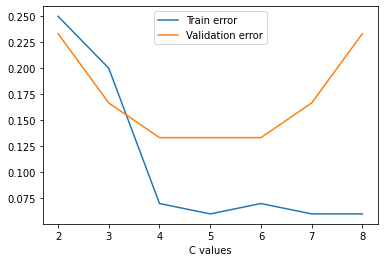

In [19]:
train_error = []
val_error = []

for i in range(2,9):
    model = SVC(kernel='poly',degree = i, C=1)
    model.fit(train_df[['alcohol', 'magnesium']], train_df['target'])
    train_pred = model.predict(train_df[['alcohol', 'magnesium']])
    val_pred = model.predict(val_df[['alcohol', 'magnesium']])
    train_error.append(1-(np.sum(train_pred == train_df['target']))/len(train_pred))
    val_error.append(1-(np.sum(val_pred == val_df['target']))/len(val_pred))

fig, ax = plt.subplots()
ax.plot(range(2,9), train_error, label='Train error')
ax.plot(range(2,9), val_error, label='Validation error')
leg = ax.legend();
plt.xlabel("C values")
plt.show()

As tought in class, the more complex the kernel the more the model tends to overfit on the training data.<br>
As seen in the graph, as the degree increases, the training error decreases. However, once the degree has passed a certian value, the validation error begins to increase as a result of an overfitted model.

#### 1.7)

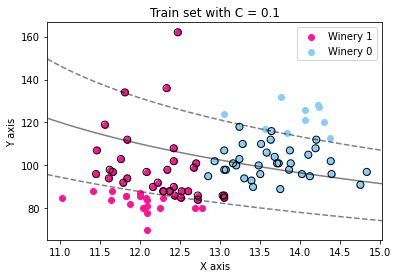

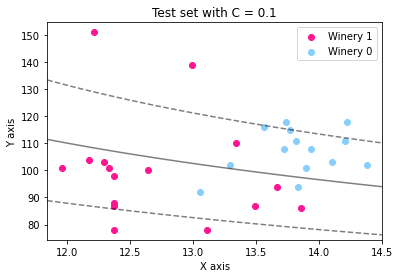

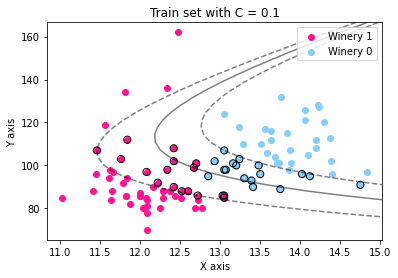

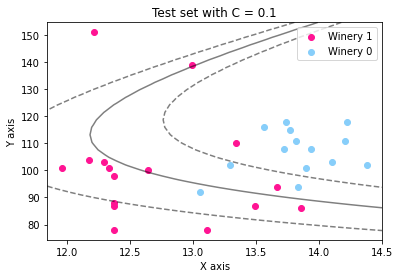

In [22]:
for i in [3,5]:
    model = SVC(kernel='poly', degree=i, C=1)
    model.fit(train_df[['alcohol', 'magnesium']], train_df['target'])
    
    train_df1 = train_df[train_df['target'] == 1] 
    train_df0 = train_df[train_df['target'] == 0] 

    colormap = np.array(['deeppink', 'lightskyblue'])

    fig,ax = plt.subplots()
    ax.scatter(train_df1['alcohol'],train_df1['magnesium'], marker='o',color='deeppink', label = "Winery 1")
    ax.scatter(train_df0['alcohol'],train_df0['magnesium'], marker='o',color='lightskyblue', label = "Winery 0")

    ax.legend()
    plt.title('Train set with C = '+str(c))
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plot_svc_decision_function(model)
    
    val_df1 = val_df[val_df['target'] == 1] 
    val_df0 = val_df[val_df['target'] == 0] 

    colormap = np.array(['deeppink', 'lightskyblue'])

    fig,ax = plt.subplots()
    ax.scatter(val_df1['alcohol'],val_df1['magnesium'], marker='o',color='deeppink', label = "Winery 1")
    ax.scatter(val_df0['alcohol'],val_df0['magnesium'], marker='o',color='lightskyblue', label = "Winery 0")

    plt.title('Test set with C = '+str(c))
    ax.legend()
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plot_svc_decision_function(model, plot_support= False)